##Mount Drive & Importing libraries

In [23]:
from google.colab import drive
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Loading the Tables

In [24]:
customers = pd.read_csv("/content/drive/MyDrive/Data Analytics Projects/Customer Retention & Churn Analytics Project/customers_dataset.csv")

orders = pd.read_csv("/content/drive/MyDrive/Data Analytics Projects/Customer Retention & Churn Analytics Project/orders_dataset.csv")

order_items = pd.read_csv("/content/drive/MyDrive/Data Analytics Projects/Customer Retention & Churn Analytics Project/order_items_dataset.csv")

payments = pd.read_csv("/content/drive/MyDrive/Data Analytics Projects/Customer Retention & Churn Analytics Project/order_payments_dataset.csv")

reviews = pd.read_csv("/content/drive/MyDrive/Data Analytics Projects/Customer Retention & Churn Analytics Project/order_reviews_dataset.csv")



##EDA on Customers

In [25]:
print(customers.shape)
customers.head()


(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [26]:
#Data type & NULL
customers.info()
customers.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [27]:
##Duplicate values in a table
customers.duplicated().sum()


np.int64(0)

In [28]:
## Unique values in specific column
customers['customer_unique_id'].nunique(), customers['customer_id'].nunique()

(96096, 99441)

In [29]:
print(customers['customer_state'].value_counts().head())
print(customers['customer_city'].nunique())

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: count, dtype: int64
4119


##Cleaning Customers

In [30]:
customers = customers.drop_duplicates()

In [31]:
customers.rename(columns={'customer_unique_id':'user_id'}, inplace=True)

##EDA on Orders

In [32]:
print(orders.info())
print(orders.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
(99441, 8)


In [33]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [34]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [35]:
print(orders['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [36]:
##To check unique counts
order_items['order_id'].nunique(), order_items['product_id'].nunique()
order_items['seller_id'].nunique()

3095

##Cleaning



```
Although in data summary it is clearly visible that for price minimum value is greater than 0 (not 0 i.e. for free) and for freight it is 0 (not in negative) but just to keep the idea of cleaning i'm applying below rules.
```



If it returns empty → there were no bad rows to begin with.

If it returns rows → those are the invalid ones you cleaned.

In [37]:
order_items[order_items['price'] <= 0]


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [38]:
# Remove rows with price <= 0
order_items = order_items[order_items['price'] > 0]
# Remove rows with freight_value < 0
order_items = order_items[order_items['freight_value'] >= 0]

In [39]:
print("Before:", len(order_items))
print("After:", len(order_items))

Before: 112650
After: 112650


In [40]:
order_items['price'].min()

0.85

##Convert timestamp to datetime

In [41]:
print(orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [42]:
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_cols:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

In [43]:
# creating delivered_flag to analyze retention for delivered and non- delivered
orders['delivered_flag'] = orders['order_status'].apply (
    lambda x: 1 if x == 'delivered' else 0
)

##Feature Engineering on Orders

In [44]:
churn_distribution = duckdb.query("""
WITH ref AS (
    SELECT MAX(order_purchase_timestamp) AS dataset_end FROM orders
),
customer_orders AS (
    SELECT
        customer_id,
        MIN(order_purchase_timestamp) AS signup_date,
        MAX(order_purchase_timestamp) AS last_order_date,
        DATE_DIFF('day', MAX(order_purchase_timestamp), (SELECT dataset_end FROM ref)) AS days_since_last_order,
        COUNT(order_id) AS total_orders
    FROM orders
    GROUP BY customer_id
),
order_gaps AS (
    SELECT
        customer_id,
        DATE_DIFF(
            'day',
            order_purchase_timestamp,
            LAG(order_purchase_timestamp) OVER (
                PARTITION BY customer_id
                ORDER BY order_purchase_timestamp
            )
        ) AS gap_days
    FROM orders
),
avg_gaps AS (
    SELECT
        customer_id,
        AVG(gap_days) AS avg_days_between_orders
    FROM order_gaps
    WHERE gap_days IS NOT NULL
    GROUP BY customer_id
),
customer_lifecycle AS (
    SELECT
        o.customer_id,
        o.signup_date,
        o.last_order_date,
        o.days_since_last_order,
        CASE WHEN o.days_since_last_order > 60 THEN 1 ELSE 0 END AS is_churned,
        DATE_TRUNC('month', o.signup_date) AS order_month,
        o.total_orders,
        g.avg_days_between_orders,
        'organic' AS channel,
        CASE
            WHEN o.days_since_last_order <= 30 THEN 'Active'
            WHEN o.days_since_last_order BETWEEN 31 AND 60 THEN 'At-Risk'
            ELSE 'Churned'
        END AS lifecycle_stage
    FROM customer_orders o
    LEFT JOIN avg_gaps g
        ON o.customer_id = g.customer_id
),
churn_distribution AS (
    SELECT
        CASE
            WHEN days_since_last_order <= 30 THEN '0-30 days'
            WHEN days_since_last_order BETWEEN 31 AND 60 THEN '31-60 days'
            WHEN days_since_last_order BETWEEN 61 AND 365 THEN '61-365 days'
            WHEN days_since_last_order BETWEEN 366 AND 1095 THEN '366-1095 days'
            WHEN days_since_last_order BETWEEN 1096 AND 2500 THEN '1096-2500 days'
            ELSE '2500+ days'
        END AS churn_bucket,
        COUNT(*) AS num_customers
    FROM customer_lifecycle
    WHERE is_churned = 1
    GROUP BY churn_bucket
)
SELECT * FROM customer_lifecycle
UNION ALL
SELECT
    churn_bucket AS customer_id,
    NULL AS signup_date,
    NULL AS last_order_date,
    NULL AS days_since_last_order,
    NULL AS is_churned,
    NULL AS order_month,
    num_customers AS total_orders,
    NULL AS avg_days_between_orders,
    NULL AS channel,
    'Churn_Bucket' AS lifecycle_stage
FROM churn_distribution;
""").df()


Order-level features (order_items → order_features)

In [45]:
order_features = duckdb.query("""
SELECT
  order_id,
  SUM(price)       AS total_order_value,
  SUM(freight_value) AS total_freight_value,
  COUNT(product_id) AS num_items
FROM order_items
GROUP BY order_id
""").df()
print("order_features rows:", len(order_features))
print(order_features[['total_order_value','num_items']].describe())
order_features.head()

order_features rows: 98666
       total_order_value     num_items
count       98666.000000  98666.000000
mean          137.754076      1.141731
std           210.645145      0.538452
min             0.850000      1.000000
25%            45.900000      1.000000
50%            86.900000      1.000000
75%           149.900000      1.000000
max         13440.000000     21.000000


,order_id,total_order_value,total_freight_value,num_items
0,e8805f1923e711c407c454831b49643f,99.90,14.87,1
1,e881dae0437e8efde70b242d9a1b5a33,92.00,23.70,2
2,e88333581538e25e87d48b2dbc1782b8,120.00,17.75,1
3,e8844ed350d0a0556e982b89e2d727cb,385.90,27.98,1
4,e884a5f13002803a9e393c21d0c1b257,74.25,53.76,3


Create customer_order_features (customer-level from order_features + orders)

In [46]:
customer_order_features = duckdb.query("""
WITH of AS (
  SELECT oi.order_id, o.customer_id, SUM(oi.price) AS total_order_value, SUM(oi.freight_value) AS total_freight_value, COUNT(oi.product_id) AS num_items
  FROM order_items oi
  JOIN orders o ON oi.order_id = o.order_id
  GROUP BY oi.order_id, o.customer_id
)
SELECT
  of.customer_id,
  AVG(of.total_order_value) AS avg_order_value,
  AVG(of.total_freight_value) AS avg_freight_value,
  AVG(of.num_items) AS avg_items_per_order,
  COUNT(DISTINCT of.order_id) AS total_orders,
  SUM(of.total_order_value) AS total_spend_items
FROM of
GROUP BY of.customer_id
""").df()

print("customer_order_features rows:", len(customer_order_features))
customer_order_features.head()


customer_order_features rows: 98666


,customer_id,avg_order_value,avg_freight_value,avg_items_per_order,total_orders,total_spend_items
0,9b5d68f669f7ed215f789471556529fe,99.9,14.87,1.0,1,99.9
1,103224917fe72e5c19889715d69865cb,85.0,15.34,1.0,1,85.0
2,4931bab39028b872b4ab9a0c38e3d552,39.9,11.74,1.0,1,39.9
3,8854083a82a0c4ce4cd3d62fd6103645,69.9,0.00,1.0,1,69.9
4,030bd1d7425888e0429cbe0b1db927c2,90.0,51.13,1.0,1,90.0


In [47]:
order_features['total_order_value'].min()

0.85

In [48]:
order_features['num_items'].describe()

,num_items
count,98666.000000
mean,1.141731
std,0.538452
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,21.000000


##Payments EDA & Cleaning

In [49]:
## To check shape and quick stats
payments.shape
payments.info()
payments.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


to look at unique payment types

In [50]:
payments['payment_type'].value_counts()


,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


To check invalid/missing values

In [51]:
print("Missing values:\n", payments.isnull().sum())
print("Negative/zero payments:\n", (payments['payment_value'] <= 0).sum())

Missing values:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Negative/zero payments:
 9


Duplicates check

In [52]:
payments.duplicated(subset=['order_id', 'payment_sequential']).sum()

np.int64(0)

Comparision with orders

In [53]:
# Orders that have no payments
missing_payments = orders[~orders['order_id'].isin(payments['order_id'])]
print("Orders without payments:", missing_payments.shape[0])

# Payments without valid orders
orphan_payments = payments[~payments['order_id'].isin(orders['order_id'])]
print("Payments without matching orders:", orphan_payments.shape[0])


Orders without payments: 1
Payments without matching orders: 0


Cleaning

In [54]:
# To remove invalid rows
payments = payments[payments['payment_value'] > 0].copy()

# To handle missing payment type
payments['payment_type'] = payments['payment_type'].fillna('unknown')


Per-order payment totals

In [55]:
order_payments_agg = duckdb.query("""
SELECT order_id, SUM(payment_value) AS order_payment_value
FROM payments
GROUP BY order_id
""").df()
order_payments_agg.head()

,order_id,order_payment_value
0,b0aab812f60f61971b4695951d09766d,177.00
1,6220b40639ab71c71d26a9ce7d5905c7,243.85
2,785b7df518015708aebc146bd8e8a26e,209.81
3,a9893544355d8abefe6473f21f162c5b,144.28
4,01218a8a807fc187849529e6f12237a9,30.10


Comparision between order_payments_agg vs order_features totals (mismatch check)

In [56]:
mismatch = duckdb.query("""
WITH of AS (
  SELECT order_id, SUM(price) AS total_order_value
  FROM order_items
  GROUP BY order_id
)
SELECT
  COALESCE(op.order_id, of.order_id) AS order_id,
  of.total_order_value,
  op.order_payment_value,
  (op.order_payment_value - of.total_order_value) AS diff
FROM of
LEFT JOIN (SELECT order_id, SUM(payment_value) AS order_payment_value FROM payments GROUP BY order_id) op
  ON of.order_id = op.order_id
ORDER BY ABS(op.order_payment_value - of.total_order_value) DESC
LIMIT 10
""").df()
mismatch


,order_id,total_order_value,order_payment_value,diff
0,cf4659487be50c0c317cff3564c4a840,1050.00,2844.96,1794.96
1,2455cbeb73fd04b170ca2504662f95ce,419.40,1421.69,1002.29
2,cfed507ac357129f750f05a0d7d71b15,1380.00,2091.33,711.33
3,71dab1155600756af6de79de92e712e3,1361.89,1988.55,626.66
4,17784b9fbb37fb0bdc230d8ed6f6b355,840.00,1342.98,502.98
5,725cf8e9c24e679a8a5a32cb92c9ce1e,1570.00,2067.42,497.42
6,5bd06bab48e0423fc35d1c236d48a6bb,1520.00,2017.08,497.08
7,be382a9e1ed25128148b97d6bfdb21af,1559.92,2039.20,479.28
8,c52c7fbe316b5b9d549e8a25206b8a1f,1161.00,1619.73,458.73
9,62073ec6b54b8e6322037fc0f3591ad3,859.66,1316.14,456.48


Customer-level monetary (payments)

In [57]:
customer_monetary = duckdb.query("""
WITH per_order AS (
  SELECT o.customer_id, p.order_id, SUM(p.payment_value) AS order_payment_value
  FROM payments p
  JOIN orders o ON p.order_id = o.order_id
  GROUP BY o.customer_id, p.order_id
)
SELECT
  customer_id,
  SUM(order_payment_value) AS total_spend_payments,
  AVG(order_payment_value) AS avg_order_payment,
  COUNT(DISTINCT order_id) AS total_orders
FROM per_order
GROUP BY customer_id
""").df()

customer_monetary.head()

,customer_id,total_spend_payments,avg_order_payment,total_orders
0,9ef432eb6251297304e76186b10a928d,38.71,38.71,1
1,ed0271e0b7da060a393796590e7b737a,65.95,65.95,1
2,3df704f53d3f1d4818840b34ec672a9f,54.36,54.36,1
3,62b423aab58096ca514ba6aa06be2f98,104.11,104.11,1
4,7e20bf5ca92da68200643bda76c504c6,227.68,227.68,1


##Reviews EDA & Cleaning

In [58]:
reviews.shape
reviews.info()
reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


uniques values of review score

In [59]:
reviews['review_score'].value_counts(dropna=False).sort_index()

,count
review_score,
1,11424
2,3151
3,8179
4,19142
5,57328


missing value check

In [60]:
print("Missing values:\n", reviews.isnull().sum())

Missing values:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


Duplicate check

In [61]:
dup_count = reviews.duplicated(subset=['review_id']).sum()
print("Duplicate review_id rows:", dup_count)

Duplicate review_id rows: 814


Distribution check

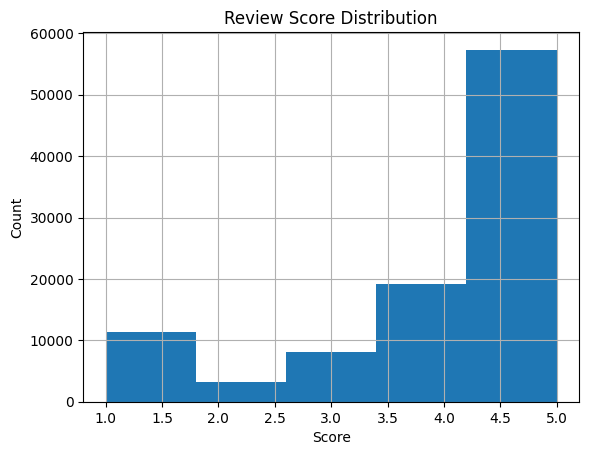

In [62]:
import matplotlib.pyplot as plt

reviews['review_score'].hist(bins=5)
plt.title("Review Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


Cross check with orders

In [63]:
# Orders without reviews
missing_reviews = orders[~orders['order_id'].isin(reviews['order_id'])]
print("Orders without reviews:", missing_reviews.shape[0])

# Reviews without valid orders
orphan_reviews = reviews[~reviews['order_id'].isin(orders['order_id'])]
print("Reviews without valid orders:", orphan_reviews.shape[0])

Orders without reviews: 768
Reviews without valid orders: 0


Cleaning

In [64]:
reviews_clean = reviews.copy()

# Remove invalid review_score
reviews_clean = reviews_clean[reviews_clean['review_score'].between(1, 5)]

# Drop duplicates by review_id
reviews_clean = reviews_clean.drop_duplicates(subset=['review_id'])

# Handle missing review_comment_message (optional → fill with empty string)
reviews_clean['review_comment_message'] = reviews_clean['review_comment_message'].fillna("")

print("After cleaning:", reviews_clean.shape)
reviews_clean.head()


After cleaning: (98410, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



Order-level reviews



In [65]:
order_reviews_agg = duckdb.query("""
SELECT order_id, AVG(review_score) AS avg_review_score, COUNT(*) AS review_count
FROM reviews
GROUP BY order_id
""").df()
order_reviews_agg.head()

,order_id,avg_review_score,review_count
0,a548910a1c6147796b98fdf73dbeba33,5.0,1
1,b18dcdf73be66366873cd26c5724d1dc,1.0,1
2,c31a859e34e3adac22f376954e19b39d,5.0,1
3,b9bf720beb4ab3728760088589c62129,4.0,1
4,9d6f15f95d01e79bd1349cc208361f09,4.0,1


Customer level review

In [66]:
customer_reviews_agg = duckdb.query("""
SELECT o.customer_id, AVG(r.review_score) AS avg_review_score, COUNT(r.review_id) AS reviews_count
FROM reviews r
JOIN orders o ON r.order_id = o.order_id
GROUP BY o.customer_id
""").df()
customer_reviews_agg.head()


,customer_id,avg_review_score,reviews_count
0,41dcb106f807e993532d446263290104,4.0,1
1,e226dfed6544df5b7b87a48208690feb,5.0,1
2,5986b333ca0d44534a156a52a8e33a83,5.0,1
3,eecafc3ff695f031bfe354a9fff9d437,1.0,1
4,840be0730010e9580efd289bc9f37706,5.0,1


Sanity Checks

In [67]:
#Distribution of average review score
print(customer_reviews_agg['avg_review_score'].describe())

count    98673.000000
mean         4.086793
std          1.346274
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_review_score, dtype: float64


In [68]:
# % missing reviews per customer
total_customers = orders['customer_id'].nunique()
reviewed_customers = customer_reviews_agg['customer_id'].nunique()

pct_missing = 1 - (reviewed_customers / total_customers)
print(f"% customers missing reviews: {pct_missing:.2%}")

% customers missing reviews: 0.77%


##Combine order-level metrics & join to orders

In [69]:
order_master = duckdb.query("""
WITH of AS (
  SELECT order_id, SUM(price) AS total_order_value, SUM(freight_value) AS total_freight_value, COUNT(product_id) AS num_items
  FROM order_items
  GROUP BY order_id
), pay AS (
  SELECT order_id, SUM(payment_value) AS order_payment_value FROM payments GROUP BY order_id
), rev AS (
  SELECT order_id, AVG(review_score) AS avg_review_score FROM reviews GROUP BY order_id
)
SELECT
  o.order_id,
  o.customer_id,
  o.order_purchase_timestamp,
  o.order_status,
  of.total_order_value,
  of.total_freight_value,
  of.num_items,
  pay.order_payment_value,
  rev.avg_review_score
FROM orders o
LEFT JOIN of ON o.order_id = of.order_id
LEFT JOIN pay ON o.order_id = pay.order_id
LEFT JOIN rev ON o.order_id = rev.order_id
""").df()

# checks
print("orders count:", len(orders))
print("order_master rows:", len(order_master))
print("distinct orders in master:", duckdb.query("SELECT COUNT(DISTINCT order_id) AS c FROM order_master").df() if 'order_master' in globals() else "skip")
order_master.head()


orders count: 99441
order_master rows: 99441
distinct orders in master:        c
0  99441


,order_id,customer_id,order_purchase_timestamp,order_status,total_order_value,total_freight_value,num_items,order_payment_value,avg_review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,delivered,29.99,8.72,1,38.71,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,delivered,118.70,22.76,1,141.46,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,delivered,159.90,19.22,1,179.12,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,delivered,45.00,27.20,1,72.20,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,delivered,19.90,8.72,1,28.62,5.0


Sanity Checks

In [70]:
# Row count check
print("Orders table rows:", len(orders))
print("Order master rows:", len(order_master))

Orders table rows: 99441
Order master rows: 99441


In [71]:
# Null check for total_order_value
null_item_orders = order_master['total_order_value'].isnull().sum()
print("Orders missing item rows:", null_item_orders)


Orders missing item rows: 775


In [72]:
# Quick stats
order_master[['total_order_value','total_freight_value','order_payment_value']].describe()


,total_order_value,total_freight_value,order_payment_value
count,98666.000000,98666.000000,99437.000000
mean,137.754076,22.823562,160.995124
std,210.645145,21.650909,221.952843
min,0.850000,0.000000,9.590000
25%,45.900000,13.850000,62.010000
50%,86.900000,17.170000,105.290000
75%,149.900000,24.040000,176.970000
max,13440.000000,1794.960000,13664.080000


##Create final customer_master (one row per customer) with RFM + joins

In [73]:
customer_master = duckdb.query("""
WITH ref AS (SELECT MAX(order_purchase_timestamp) AS dataset_end FROM orders),
customer_orders AS (
  SELECT
    o.customer_id,
    MIN(o.order_purchase_timestamp) AS signup_date,
    MAX(o.order_purchase_timestamp) AS last_order_date,
    DATE_DIFF('day', MAX(o.order_purchase_timestamp), (SELECT dataset_end FROM ref)) AS days_since_last_order,
    COUNT(o.order_id) AS total_orders
  FROM orders o
  GROUP BY o.customer_id
),
order_feats AS (
  SELECT oi.order_id, o.customer_id, SUM(oi.price) AS total_order_value, SUM(oi.freight_value) AS total_freight_value, COUNT(oi.product_id) AS num_items
  FROM order_items oi
  JOIN orders o ON oi.order_id = o.order_id
  GROUP BY oi.order_id, o.customer_id
),
customer_order_feats AS (
  SELECT
    customer_id,
    AVG(total_order_value) AS avg_order_value,
    AVG(total_freight_value) AS avg_freight_value,
    AVG(num_items) AS avg_items_per_order,
    SUM(total_order_value) AS total_spend_items
  FROM order_feats
  GROUP BY customer_id
),
customer_pay AS (
  SELECT o.customer_id, SUM(p.payment_value) AS total_spend_payments
  FROM payments p
  JOIN orders o ON p.order_id = o.order_id
  GROUP BY o.customer_id
),
customer_reviews AS (
  SELECT o.customer_id, AVG(r.review_score) AS avg_review_score, COUNT(r.review_id) AS reviews_count
  FROM reviews r
  JOIN orders o ON r.order_id = o.order_id
  GROUP BY o.customer_id
)
SELECT
  co.customer_id,
  co.signup_date,
  co.last_order_date,
  co.days_since_last_order AS recency_days,
  co.total_orders AS frequency,
  COALESCE(cp.total_spend_payments, cof.total_spend_items, 0) AS monetary,
  cof.avg_order_value,
  cof.avg_items_per_order,
  cof.avg_freight_value,
  cr.avg_review_score,
  cr.reviews_count
FROM customer_orders co
LEFT JOIN customer_order_feats cof ON co.customer_id = cof.customer_id
LEFT JOIN customer_pay cp ON co.customer_id = cp.customer_id
LEFT JOIN customer_reviews cr ON co.customer_id = cr.customer_id
""").df()

print("customer_master rows:", len(customer_master))
customer_master.head()

customer_master rows: 99441


,customer_id,signup_date,last_order_date,recency_days,frequency,monetary,avg_order_value,avg_items_per_order,avg_freight_value,avg_review_score,reviews_count
0,62efb165f6f8e441bf9094840e818608,2018-04-22 20:05:44,2018-04-22 20:05:44,178,1,122.99,122.99,1.0,0.00,5.0,1
1,2b11be9617fad2924dfc186b73220db0,2018-02-28 19:16:03,2018-02-28 19:16:03,231,1,413.88,385.90,1.0,27.98,5.0,1
2,a3586509a27757e4e4825418e8f1174d,2018-04-02 23:31:13,2018-04-02 23:31:13,198,1,169.87,151.90,1.0,17.97,3.0,1
3,49ee772ae3757a7a5a306a582d2907a5,2017-09-09 15:40:34,2017-09-09 15:40:34,403,1,100.86,79.90,1.0,20.96,2.0,1
4,bd2fe6a35c295706596da2439a669278,2017-05-08 20:58:38,2017-05-08 20:58:38,527,1,116.14,94.99,1.0,21.15,3.0,1


Sanity Checks

In [74]:
# 1. Row count check
print("customer_master rows:", len(customer_master))
print("Unique customers (from customers table):", customers['customer_id'].nunique())

customer_master rows: 99441
Unique customers (from customers table): 99441


In [75]:
# 2. Null check
print("Nulls in customer_master:")
print(customer_master.isnull().sum())

Nulls in customer_master:
customer_id              0
signup_date              0
last_order_date          0
recency_days             0
frequency                0
monetary                 0
avg_order_value        775
avg_items_per_order    775
avg_freight_value      775
avg_review_score       768
reviews_count          768
dtype: int64


## Simulate repeat purchases for demo
Olist has mostly 1-time buyers. We'll simulate some repeat purchases
to demonstrate retention heatmaps & curves.

In [76]:
# 1- Simulate repeat purchases for demo
# =========================================================
# Olist has mostly 1-time buyers. We'll simulate some repeat purchases
# to demonstrate retention heatmaps & curves.

import numpy as np
#random seed (for reproducibility)
np.random.seed(42)# -------------------------------
# Step 4: Display results
# -------------------------------


orders_demo = orders.copy()

#Select a fraction of customers for repeat purchase simulation
repeat_customers = orders_demo['customer_id'].drop_duplicates().sample(frac=0.2, random_state=42)
extra_orders_list = []

#Loop to generate extra orders for each selected customer
for customer in repeat_customers:
    customer_orders = orders_demo[orders_demo['customer_id'] == customer]
    num_extra_orders = np.random.randint(1, 4)  # 1 to 3 extra orders

    for i in range(num_extra_orders):
        base_order = customer_orders.sample(1).iloc[0].copy()
        gap_days = np.random.randint(30, 121)  # random gap between 30–120 days
        base_order['order_id'] = f"{base_order['order_id']}_r{i+1}"  # new order ID
        base_order['order_purchase_timestamp'] += pd.Timedelta(days=gap_days)
        extra_orders_list.append(base_order)

# Concatenate extra orders with original dataset and sort
if extra_orders_list:
    extra_orders_df = pd.DataFrame(extra_orders_list)
    orders_demo = pd.concat([orders_demo, extra_orders_df]).reset_index(drop=True)

orders_demo = orders_demo.sort_values(by=['customer_id', 'order_purchase_timestamp']).reset_index(drop=True)

#Sanity check
print("Original orders:", len(orders))
print("Simulated orders:", len(orders_demo))
print("Number of customers with repeat orders:", len(repeat_customers))

Original orders: 99441
Simulated orders: 139090
Number of customers with repeat orders: 19888


In [77]:
orders_demo.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_flag
0,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04,1
1,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04,1
2,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22,1
3,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14,1
4,5825ce2e88d5346438686b0bba99e5ee_r1,0002414f95344307404f0ace7a26f1d5,delivered,2017-10-29 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14,1


In [78]:
orders_demo.to_csv('/content/drive/MyDrive/Data Analytics Projects/Customer Retention & Churn Analytics Project/orders_demo.csv', index=False)
print("export done")

export done


##KPI Tree and Funnel Analysis

##Funnel Simulation

In [79]:
#Build customer-level funnel
# -------------------------------

# a: Actual purchasers
customers = orders_demo['customer_id'].drop_duplicates().to_frame(name='customer_id')

# b: Simulate Repeat Purchase flag
order_counts = orders_demo.groupby('customer_id')['order_id'].count().reset_index()
order_counts['repeat_purchase'] = (order_counts['order_id'] >= 2).astype(int)
customers = customers.merge(order_counts[['customer_id', 'repeat_purchase']], on='customer_id', how='left')

# c: Purchased stage (actual purchasers)
customers['purchased'] = 1

# d: Add to Cart stage (subset of customers who browsed)
# We'll simulate that only 70% of all users browsed actually added to cart
# For now, we will fill add_to_cart after simulating browse stage

# e: Browse stage (all purchasers + extra simulated browsers)
num_extra_browsers = int(0.2 * len(customers))
extra_browsers = pd.DataFrame({'customer_id': [f'sim_{i}' for i in range(num_extra_browsers)]})
extra_browsers['purchased'] = 0
extra_browsers['repeat_purchase'] = 0

# Combine to get all users who browsed
customers['browsed'] = 1
extra_browsers['browsed'] = 1

funnel_customers = pd.concat([customers, extra_browsers], ignore_index=True)

# f: Add to Cart stage
# Only 70% of browsed users (including extra browsers) move to add_to_cart
np.random.seed(42)
funnel_customers['add_to_cart'] = np.random.choice([1,0], size=len(funnel_customers), p=[0.7,0.3])

# Ensure purchased customers always have add_to_cart = 1
funnel_customers.loc[funnel_customers['purchased'] == 1, 'add_to_cart'] = 1
funnel_customers.head()


,customer_id,repeat_purchase,purchased,browsed,add_to_cart
0,00012a2ce6f8dcda20d059ce98491703,0,1,1,1
1,000161a058600d5901f007fab4c27140,0,1,1,1
2,0001fd6190edaaf884bcaf3d49edf079,0,1,1,1
3,0002414f95344307404f0ace7a26f1d5,1,1,1,1
4,000379cdec625522490c315e70c7a9fb,0,1,1,1


##KPI Tree

In [80]:
#Build KPI Tree
#calculate total orders, active users, frequency, and AOV per month
kpi_tree = duckdb.query("""
WITH monthly_agg AS (
    SELECT
        DATE_TRUNC('month', o.order_purchase_timestamp) AS month,
        COUNT(DISTINCT o.customer_id) AS active_users,
        COUNT(o.order_id) AS total_orders,
        AVG(p.payment_value) AS avg_order_value
    FROM orders_demo o
    JOIN payments p ON o.order_id = p.order_id
    GROUP BY month
)
SELECT
    month,
    active_users,
    total_orders,
    CAST(total_orders AS DOUBLE) / active_users AS frequency,
    ROUND(avg_order_value, 2) AS AOV
FROM monthly_agg
ORDER BY month
""").df()
kpi_tree.head()


,month,active_users,total_orders,frequency,AOV
0,2016-09-01,3,3,1.000000,84.08
1,2016-10-01,324,342,1.055556,172.78
2,2016-12-01,1,1,1.000000,19.62
3,2017-01-01,800,850,1.062500,162.93
4,2017-02-01,1780,1886,1.059551,154.78


#Repeat Purchase Rate

In [81]:
#repeat purchase rate
repeat_purchase_rate = duckdb.query("""
WITH monthly_orders AS (
    SELECT
        customer_id,
        DATE_TRUNC('month', order_purchase_timestamp) AS month,
        COUNT(order_id) AS orders_per_month
    FROM orders_demo
    GROUP BY customer_id, month
),
repeat_stats AS (
    SELECT
        month,
        COUNT(DISTINCT customer_id) AS total_users,
        COUNT(DISTINCT CASE WHEN orders_per_month >= 2 THEN customer_id END) AS repeat_users
    FROM monthly_orders
    GROUP BY month
)
SELECT
    month,
    total_users,
    repeat_users,
    ROUND(CAST(repeat_users AS DOUBLE) / total_users * 100, 2) AS repeat_purchase_rate
FROM repeat_stats
ORDER BY month;
""").df()


In [82]:
repeat_purchase_rate.head()

,month,total_users,repeat_users,repeat_purchase_rate
0,2016-09-01,4,0,0.00
1,2016-10-01,324,0,0.00
2,2016-11-01,32,3,9.38
3,2016-12-01,35,10,28.57
4,2017-01-01,834,8,0.96


##Funnel drop-offs

In [83]:
#funnel counts and drop-offs

funnel_dropoffs = duckdb.query("""
WITH stage_counts AS (
    SELECT
        SUM(browsed) AS browsed,
        SUM(add_to_cart) AS add_to_cart,
        SUM(purchased) AS purchased,
        SUM(repeat_purchase) AS repeat_purchase
    FROM funnel_customers
),
stages AS (
    SELECT 1 AS stage_order, 'Browsed' AS stage, browsed AS users FROM stage_counts
    UNION ALL
    SELECT 2, 'Add to Cart', add_to_cart FROM stage_counts
    UNION ALL
    SELECT 3, 'Purchased', purchased FROM stage_counts
    UNION ALL
    SELECT 4, 'Repeat Purchase', repeat_purchase FROM stage_counts
),
dropoff AS (
    SELECT
        stage_order,
        stage,
        users,
        LAG(users) OVER (ORDER BY stage_order) AS prev_users
    FROM stages
)
SELECT
    stage,
    users,
    ROUND(CASE WHEN prev_users IS NULL THEN 0
               ELSE (prev_users - users) * 100.0 / prev_users END, 2) AS dropoff_pct
FROM dropoff
ORDER BY stage_order;

""").df()

# Check the result
print(funnel_dropoffs)


             stage     users  dropoff_pct
0          Browsed  119329.0         0.00
1      Add to Cart  113308.0         5.05
2        Purchased   99441.0        12.24
3  Repeat Purchase   19888.0        80.00


In [84]:
funnel_dropoffs.to_csv('/content/drive/MyDrive/Data Analytics Projects/Customer Retention & Churn Analytics Project/funnel_dropoffs.csv', index=False)
print("export done")

export done


## Cohort and Retention Analysis



In [85]:
# CUSTOMER LEVEL MATRICS
# 1. total spend per customer
customer_metrics = duckdb.query("""
WITH total_spend AS
(SELECT o.customer_id, SUM(p.payment_value) AS total_spend
FROM payments p
JOIN orders_demo o ON p.order_id = o.order_id
GROUP BY o.customer_id
),
--2. average order value (AOV) per customer

aov AS
(SELECT o.customer_id, AVG(p.payment_value) AS avg_order_value
FROM payments p
JOIN orders_demo o ON p.order_id = o.order_id
GROUP BY o.customer_id
),
--3. total number of orders per customer

total_orders AS
(SELECT customer_id, COUNT(order_id) AS total_orders
FROM orders_demo
GROUP BY customer_id
),
--4. customers whose total spend is above the average spend

high_spenders AS
(SELECT o.customer_id, SUM(p.payment_value) AS total_spend
FROM payments p
JOIN orders_demo o ON p.order_id = o.order_id
GROUP BY o.customer_id
HAVING SUM(p.payment_value) > (SELECT AVG(total_spend) FROM total_spend)
),

--5. customers whose AOV is above the average AOV

high_value_customers AS
(SELECT o.customer_id, AVG(p.payment_value) AS avg_order_value
FROM payments p
JOIN orders_demo o ON p.order_id = o.order_id
GROUP BY o.customer_id
HAVING AVG(p.payment_value)>(SELECT AVG(avg_order_value) FROM aov)
)

SELECT
    ts.customer_id,
    ts.total_spend,
    a.avg_order_value,
    t.total_orders,
    hs.total_spend AS high_spender_spend,
    hvc.avg_order_value AS high_value_aov
FROM total_spend ts
JOIN aov a ON ts.customer_id = a.customer_id
JOIN total_orders t ON ts.customer_id = t.customer_id
JOIN high_spenders hs ON ts.customer_id = hs.customer_id
JOIN high_value_customers hvc ON ts.customer_id = hvc.customer_id
""").df()


In [86]:
customer_metrics.head()

,customer_id,total_spend,avg_order_value,total_orders,high_spender_spend,high_value_aov
0,bbafed830860c0e9a0c50b6371c462ee,165.29,165.29,1,165.29,165.29
1,bbb1072005d6085620aae34c1b06a6b2,212.82,212.82,1,212.82,212.82
2,bbb2c952b4db558ca2132fd705d6bc5f,292.28,292.28,1,292.28,292.28
3,bbbaa74c8397d487f8a22d52330f9275,195.00,195.00,3,195.00,195.00
4,bbbb2dfdc184d84aac9ce9c6700530ee,615.75,615.75,4,615.75,615.75


#First and Last Purchase and customer lifetime

In [87]:
#First and Last Purchase
first_last_purchase = duckdb.query("""

WITH first_purchase AS
--first purchase date per customer
(SELECT customer_id, MIN(order_purchase_timestamp) AS first_purchase_date
FROM orders_demo
GROUP BY customer_id),

--last purchase date per customer
last_purchase AS
(SELECT customer_id, MAX(order_purchase_timestamp) AS last_purchase_date
FROM orders_demo
GROUP BY customer_id
),

--customer lifetime (in days) = last purchase - first purchase
customer_lifetime AS (
  SELECT fp.customer_id, fp.first_purchase_date, lp.last_purchase_date,
  DATE_DIFF('day', fp.first_purchase_date, lp.last_purchase_date) AS customer_lifetime
  FROM first_purchase fp
  JOIN last_purchase lp ON fp.customer_id = lp.customer_id
  ORDER BY customer_lifetime DESC
)

SELECT * FROM customer_lifetime
""").df()

In [88]:
first_last_purchase.head()

,customer_id,first_purchase_date,last_purchase_date,customer_lifetime
0,007dca6150a323ecb560d11f2a3615a2,2018-03-03 15:50:28,2018-07-01 15:50:28,120
1,01f73b778c4f92ec0b55fa90e306d82b,2018-07-26 10:06:35,2018-11-23 10:06:35,120
2,02fe8d515ed6bdaba7035d433bdac524,2017-06-25 13:59:03,2017-10-23 13:59:03,120
3,045d1980b25d907232ab04bab9299c82,2018-03-27 16:37:34,2018-07-25 16:37:34,120
4,06a0aeaba8ae05e4dfec7817ed0eca21,2018-02-11 17:02:23,2018-06-11 17:02:23,120


##Monthly Cohort & Retention Analysis:

In [89]:
##Cohort Assignment
cohort_monthly = duckdb.query("""
CREATE OR REPLACE TABLE cohort_table AS
SELECT
    customer_id,
    DATE_TRUNC('month', MIN(order_purchase_timestamp)) AS cohort_month
FROM orders_demo
GROUP BY customer_id;
""")
cohort_table = duckdb.query("SELECT * FROM cohort_table").df()


In [90]:
cohort_table.head()

,customer_id,cohort_month
0,bbb6209ec81e15add72706f298fe88e2,2018-01-01
1,bbb964878c61d19d0f26b95bba50802e,2018-06-01
2,bbbb6bbcabbb1712d83b6d996869b412,2018-08-01
3,bbbbb2b0c3acafd69a8ce2c286802458,2018-04-01
4,bbbc3d5bb59190293cae4efbc5b66eb1,2018-01-01


In [91]:
# Order Alignment
order_month = duckdb.query("""

WITH orders_monthly AS (
    -- Add order_month to orders
    SELECT
        order_id,
        customer_id,
        DATE_TRUNC('month', order_purchase_timestamp) AS order_month
    FROM orders_demo
)
SELECT *
FROM orders_monthly

""").df()


In [92]:
order_month.head()

,order_id,customer_id,order_month
0,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,2017-11-01
1,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,2017-07-01
2,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,2017-02-01
3,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,2017-08-01
4,5825ce2e88d5346438686b0bba99e5ee_r1,0002414f95344307404f0ace7a26f1d5,2017-10-01


In [93]:
##Join Orders with Cohort Table
orders_monthly = duckdb.query("""
WITH orders_monthly AS (

    SELECT
        order_id,
        customer_id,
        DATE_TRUNC('month', order_purchase_timestamp) AS order_month
    FROM orders_demo
)
SELECT
    o.customer_id,
    o.order_id,
    o.order_month,
    c.cohort_month
FROM orders_monthly o
JOIN cohort_table c
    ON o.customer_id = c.customer_id
LIMIT 10;
""").df()

In [94]:
orders_monthly.head()

,customer_id,order_id,order_month,cohort_month
0,00012a2ce6f8dcda20d059ce98491703,5f79b5b0931d63f1a42989eb65b9da6e,2017-11-01,2017-11-01
1,000161a058600d5901f007fab4c27140,a44895d095d7e0702b6a162fa2dbeced,2017-07-01,2017-07-01
2,0001fd6190edaaf884bcaf3d49edf079,316a104623542e4d75189bb372bc5f8d,2017-02-01,2017-02-01
3,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee,2017-08-01,2017-08-01
4,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee_r1,2017-10-01,2017-08-01


#Cohort Index (Month Offset) for each order and filter only delivered orders

In [95]:
#Cohort Index (Month Offset) for each order and filter only delivered orders

cohort_index_monthly = duckdb.query("""
WITH orders_with_cohort AS (
    SELECT
        o.customer_id,
        o.order_id,
        o.order_status,
        DATE_TRUNC('month', o.order_purchase_timestamp) AS order_month,
        c.cohort_month
    FROM orders_demo o
    JOIN cohort_table c
        ON o.customer_id = c.customer_id
    WHERE o.order_status = 'delivered'
)
SELECT
    customer_id,
    order_id,
    order_month,
    order_status,
    cohort_month,
    DATE_DIFF('month', cohort_month, order_month) AS cohort_index
FROM orders_with_cohort
ORDER BY customer_id, order_month
LIMIT 10;
""").df()



In [96]:
cohort_index_monthly.head()

,customer_id,order_id,order_month,order_status,cohort_month,cohort_index
0,00012a2ce6f8dcda20d059ce98491703,5f79b5b0931d63f1a42989eb65b9da6e,2017-11-01,delivered,2017-11-01,0
1,000161a058600d5901f007fab4c27140,a44895d095d7e0702b6a162fa2dbeced,2017-07-01,delivered,2017-07-01,0
2,0001fd6190edaaf884bcaf3d49edf079,316a104623542e4d75189bb372bc5f8d,2017-02-01,delivered,2017-02-01,0
3,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee,2017-08-01,delivered,2017-08-01,0
4,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee_r1,2017-10-01,delivered,2017-08-01,2


#Cohort Metrics (Monthly)

count unique active customers and calculate total and average spend per cohort per cohort_index

In [97]:
#Cohort Metrics (Monthly)
# count unique active customers and calculate total and average spend per cohort per cohort_index
cohort_metrics_monthly = duckdb.query("""
WITH cohort_orders AS (
    SELECT
        o.customer_id,
        DATE_TRUNC('month', o.order_purchase_timestamp) AS order_month,
        c.cohort_month,
        DATE_DIFF('month', c.cohort_month, DATE_TRUNC('month', o.order_purchase_timestamp)) AS cohort_index,
        p.payment_value
    FROM orders_demo o
    JOIN cohort_table c
        ON o.customer_id = c.customer_id
    JOIN payments p
        ON o.order_id = p.order_id
    WHERE o.order_status = 'delivered'
)
SELECT
    cohort_month,
    cohort_index,
    COUNT(DISTINCT customer_id) AS active_customers,
    SUM(payment_value) AS total_spend,
    AVG(payment_value) AS avg_spend
FROM cohort_orders
GROUP BY cohort_month, cohort_index
ORDER BY cohort_month, cohort_index;
""").df()

In [98]:
cohort_metrics_monthly.head()

,cohort_month,cohort_index,active_customers,total_spend,avg_spend
0,2016-10-01,0,265,46566.71,165.130177
1,2016-12-01,0,1,19.62,19.620000
2,2017-01-01,0,750,127545.67,159.631627
3,2017-02-01,0,1653,271298.65,155.116438
4,2017-03-01,0,2546,414369.39,153.470144


#Retention Matrix + Retention %

In [99]:
#Retention Matrix + Retention %
retention_matrix_monthly = duckdb.query("""
WITH cohort_orders AS (
    SELECT
        o.customer_id,
        DATE_TRUNC('month', o.order_purchase_timestamp) AS order_month,
        c.cohort_month,
        DATE_DIFF('month', c.cohort_month, DATE_TRUNC('month', o.order_purchase_timestamp)) AS cohort_index
    FROM orders_demo o
    JOIN cohort_table c
        ON o.customer_id = c.customer_id
    WHERE o.order_status = 'delivered'
),
cohort_counts AS (
    SELECT
        cohort_month,
        cohort_index,
        COUNT(DISTINCT customer_id) AS active_customers
    FROM cohort_orders
    GROUP BY cohort_month, cohort_index
),
cohort_sizes AS (
    SELECT
        cohort_month,
        COUNT(DISTINCT customer_id) AS cohort_size
    FROM cohort_orders
    WHERE cohort_index = 0
    GROUP BY cohort_month
)
SELECT
    cc.cohort_month,
    cc.cohort_index,
    cc.active_customers,
    cs.cohort_size,
    ROUND(cc.active_customers * 100.0 / cs.cohort_size, 2) AS retention_pct
FROM cohort_counts cc
JOIN cohort_sizes cs
    ON cc.cohort_month = cs.cohort_month
ORDER BY cc.cohort_month, cc.cohort_index;
""").df()

In [100]:
retention_matrix_monthly.head()

,cohort_month,cohort_index,active_customers,cohort_size,retention_pct
0,2016-09-01,0,1,1,100.00
1,2016-09-01,2,1,1,100.00
2,2016-10-01,0,265,265,100.00
3,2016-10-01,1,29,265,10.94
4,2016-10-01,2,28,265,10.57


#Cohort Assignment (Weekly)

In [101]:
#Cohort Assignment (Weekly)
duckdb.query("""
CREATE OR REPLACE TABLE cohort_weekly AS
SELECT
    customer_id,
    DATE_TRUNC('week', MIN(order_purchase_timestamp)) AS cohort_week
FROM orders_demo
GROUP BY customer_id
""")

# If you want to see the data after creation, run a SELECT
cohort_weekly = duckdb.query("SELECT * FROM cohort_weekly LIMIT 10").df()
cohort_weekly


,customer_id,cohort_week
0,bbaecf87a9363029f2406448dd098b16,2017-12-25
1,bbafed830860c0e9a0c50b6371c462ee,2017-11-20
2,bbb03db80916f67f5b072516390bb4cf,2017-10-23
3,bbb1072005d6085620aae34c1b06a6b2,2018-04-30
4,bbb1f572f496bed6a095cdc073c45311,2018-08-13
5,bbb2c952b4db558ca2132fd705d6bc5f,2017-10-16
6,bbb43aad9fde7b0d46df42c694e8458d,2018-08-13
7,bbb555d3e572820b99a0469b147228b5,2018-05-21
8,bbb7b12bdc6176961cf2771aa1ffb6f2,2017-12-11
9,bbb9cd869774a135413dc0aa80e698d6,2017-08-21


#Order Alignment (Weekly)

In [102]:
#Order Alignment (Weekly)
orders_weekly = duckdb.query("""
WITH orders_weekly AS (
    SELECT
        order_id,
        customer_id,
        DATE_TRUNC('week', order_purchase_timestamp) AS order_week
    FROM orders_demo
)
SELECT * FROM orders_weekly;
""").df()

In [103]:
orders_weekly.head()

,order_id,customer_id,order_week
0,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,2017-11-13
1,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,2017-07-10
2,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,2017-02-27
3,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,2017-08-14
4,5825ce2e88d5346438686b0bba99e5ee_r1,0002414f95344307404f0ace7a26f1d5,2017-10-23


#Join Orders with Cohort Table

In [104]:
#Join Orders with Cohort Table
cohort_orders_weekly = duckdb.query("""
WITH cohort_orders AS (
    SELECT
        o.customer_id,
        DATE_TRUNC('week', o.order_purchase_timestamp) AS order_week,
        c.cohort_week
    FROM orders_demo o
    JOIN cohort_weekly c
        ON o.customer_id = c.customer_id
)
SELECT * FROM cohort_orders;
""").df()


In [105]:
cohort_orders_weekly.head()

,customer_id,order_week,cohort_week
0,bbaecf87a9363029f2406448dd098b16,2017-12-25,2017-12-25
1,bbafed830860c0e9a0c50b6371c462ee,2017-11-20,2017-11-20
2,bbb03db80916f67f5b072516390bb4cf,2017-10-23,2017-10-23
3,bbb1072005d6085620aae34c1b06a6b2,2018-04-30,2018-04-30
4,bbb1f572f496bed6a095cdc073c45311,2018-08-13,2018-08-13


#Cohort Index (Weekly)

In [106]:
#Cohort Index (Weekly)
cohort_index_weekly = duckdb.query("""
WITH cohort_orders AS (
    SELECT
        o.customer_id,
        DATE_TRUNC('week', o.order_purchase_timestamp) AS order_week,
        c.cohort_week,
        DATE_DIFF('week', c.cohort_week, DATE_TRUNC('week', o.order_purchase_timestamp)) AS cohort_index
    FROM orders_demo o
    JOIN cohort_weekly c
        ON o.customer_id = c.customer_id
    WHERE o.order_status = 'delivered'
)
SELECT * FROM cohort_orders;
""").df()

In [107]:
cohort_index_weekly.head()

,customer_id,order_week,cohort_week,cohort_index
0,bbafed830860c0e9a0c50b6371c462ee,2017-11-20,2017-11-20,0
1,bbb03db80916f67f5b072516390bb4cf,2017-10-23,2017-10-23,0
2,bbb1072005d6085620aae34c1b06a6b2,2018-04-30,2018-04-30,0
3,bbb1f572f496bed6a095cdc073c45311,2018-08-13,2018-08-13,0
4,bbb2c952b4db558ca2132fd705d6bc5f,2017-10-16,2017-10-16,0


#Cohort Metrics (Weekly)

In [108]:
#Cohort Metrics (Weekly)
cohort_matrix_weekly = duckdb.query("""
WITH cohort_orders AS (
    SELECT
        o.customer_id,
        DATE_TRUNC('week', o.order_purchase_timestamp) AS order_week,
        c.cohort_week,
        DATE_DIFF('week', c.cohort_week, DATE_TRUNC('week', o.order_purchase_timestamp)) AS cohort_index,
        p.payment_value
    FROM orders_demo o
    JOIN cohort_weekly c
        ON o.customer_id = c.customer_id
    JOIN payments p
        ON o.order_id = p.order_id
    WHERE o.order_status = 'delivered'
)
SELECT
    cohort_week,
    cohort_index,
    COUNT(DISTINCT customer_id) AS active_customers,
    SUM(payment_value) AS total_spend,
    AVG(payment_value) AS avg_spend
FROM cohort_orders
GROUP BY cohort_week, cohort_index
ORDER BY cohort_week, cohort_index;
""").df()


In [109]:
cohort_matrix_weekly.head()

,cohort_week,cohort_index,active_customers,total_spend,avg_spend
0,2016-10-03,0,231,42669.98,174.163184
1,2016-10-10,0,34,3896.73,105.317027
2,2016-12-19,0,1,19.62,19.620000
3,2017-01-02,0,44,3651.39,76.070625
4,2017-01-09,0,73,12590.09,172.466986


#Retention Matrix (Weekly)

In [110]:
#Retention Matrix (Weekly)
retention_matrix_weekly = duckdb.query("""
WITH cohort_orders AS (
    SELECT
        o.customer_id,
        DATE_TRUNC('week', o.order_purchase_timestamp) AS order_week,
        c.cohort_week,
        DATE_DIFF('week', c.cohort_week, DATE_TRUNC('week', o.order_purchase_timestamp)) AS cohort_index
    FROM orders_demo o
    JOIN cohort_weekly c
        ON o.customer_id = c.customer_id
    WHERE o.order_status = 'delivered'
),
active_customers AS (
    SELECT
        cohort_week,
        cohort_index,
        COUNT(DISTINCT customer_id) AS active_customers
    FROM cohort_orders
    GROUP BY cohort_week, cohort_index
)
SELECT *
FROM active_customers
PIVOT (SUM(active_customers) FOR cohort_index IN (0,1,2,3,4,5,6,7,8,9));
""").df()


In [111]:
retention_matrix_weekly.head()

,cohort_week,0,1,2,3,4,5,6,7,8,9
0,2016-09-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,2016-10-03,231.0,NaN,NaN,NaN,2.0,4.0,9.0,9.0,10.0,8.0
2,2016-10-10,34.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0
3,2016-12-19,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-02,44.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,NaN,1.0


#Retention % (Weekly)

In [112]:
#Retention % (Weekly)
retention_rate_weekly = duckdb.query("""
WITH cohort_orders AS (
    SELECT
        o.customer_id,
        DATE_TRUNC('week', o.order_purchase_timestamp) AS order_week,
        c.cohort_week,
        DATE_DIFF('week', c.cohort_week, DATE_TRUNC('week', o.order_purchase_timestamp)) AS cohort_index
    FROM orders_demo o
    JOIN cohort_weekly c
        ON o.customer_id = c.customer_id
    WHERE o.order_status = 'delivered'
),
active_customers AS (
    SELECT
        cohort_week,
        cohort_index,
        COUNT(DISTINCT customer_id) AS active_customers
    FROM cohort_orders
    GROUP BY cohort_week, cohort_index
),
base AS (
    SELECT
        cohort_week,
        MAX(CASE WHEN cohort_index = 0 THEN active_customers END) AS base_customers
    FROM active_customers
    GROUP BY cohort_week
)
SELECT
    a.cohort_week,
    a.cohort_index,
    ROUND(a.active_customers * 100.0 / b.base_customers, 2) AS retention_pct
FROM active_customers a
JOIN base b
    ON a.cohort_week = b.cohort_week
ORDER BY a.cohort_week, a.cohort_index;
""").df()


In [113]:
retention_rate_weekly.head()

,cohort_week,cohort_index,retention_pct
0,2016-09-12,0,100.00
1,2016-09-12,7,100.00
2,2016-10-03,0,100.00
3,2016-10-03,4,0.87
4,2016-10-03,5,1.73


##Churn Analysis

# Monthly Churn from retention

In [114]:
##Churn Analysis
# Monthly Churn from retention
churn_monthly = duckdb.query("""
SELECT
    cohort_month,
    cohort_index,
    100 - retention_pct AS churn_pct
FROM retention_matrix_monthly
ORDER BY cohort_month, cohort_index;
""").df()

churn_monthly.head()


,cohort_month,cohort_index,churn_pct
0,2016-09-01,0,0.00
1,2016-09-01,2,0.00
2,2016-10-01,0,0.00
3,2016-10-01,1,89.06
4,2016-10-01,2,89.43


# Weekly Churn from weekly retention

In [115]:
## Weekly Churn from retention
# Weekly Churn from weekly retention
churn_weekly = duckdb.query("""
SELECT
    cohort_week,
    cohort_index,
    100 - retention_pct AS churn_pct
FROM retention_rate_weekly
ORDER BY cohort_week, cohort_index;
""").df()

churn_weekly.head()


,cohort_week,cohort_index,churn_pct
0,2016-09-12,0,0.00
1,2016-09-12,7,0.00
2,2016-10-03,0,0.00
3,2016-10-03,4,99.13
4,2016-10-03,5,98.27


In [116]:
DAU = duckdb.query("""
SELECT DATE(order_purchase_timestamp) AS day,
           COUNT(DISTINCT customer_id) AS dau
    FROM orders_demo
    GROUP BY day
    """).df()
DAU.head()

,day,dau
0,2017-12-31,152
1,2018-08-18,283
2,2017-10-01,183
3,2017-07-29,163
4,2017-10-13,196


In [117]:
MAU = duckdb.query("""
SELECT DATE_TRUNC('month', order_purchase_timestamp) AS month,
           COUNT(DISTINCT customer_id) AS mau
    FROM orders_demo
    GROUP BY month
    """).df()
MAU.head()

,month,mau
0,2018-08-01,8595
1,2017-08-01,5520
2,2017-07-01,5024
3,2018-05-01,9274
4,2017-04-01,2862


#Stickiness

In [118]:
#Stickiness
stickiness = duckdb.query("""
-- Stickiness per month
WITH dau AS (
    SELECT DATE_TRUNC('month', order_purchase_timestamp) AS month,
           COUNT(DISTINCT customer_id) AS dau
    FROM orders_demo
    GROUP BY 1
),
mau AS (
    SELECT DATE_TRUNC('month', order_purchase_timestamp) AS month,
           COUNT(DISTINCT customer_id) AS mau
    FROM orders_demo
    GROUP BY 1
)
SELECT
    d.month AS time,
    d.dau AS avg_dau,
    m.mau AS avg_mau,
    ROUND(d.dau * 100.0 / m.mau, 2) AS stickiness_pct
FROM dau d
JOIN mau m ON d.month = m.month
ORDER BY d.month;

""").df()

In [119]:
stickiness.head()

,time,avg_dau,avg_mau,stickiness_pct
0,2016-09-01,4,4,100.0
1,2016-10-01,324,324,100.0
2,2016-11-01,32,32,100.0
3,2016-12-01,35,35,100.0
4,2017-01-01,834,834,100.0


In [120]:
stickiness.to_csv('/content/drive/MyDrive/Data Analytics Projects/Customer Retention & Churn Analytics Project/stickiness.csv', index=False)
print("export done")

export done


# Monthly Retention Curve (Pivot)

In [121]:
# Monthly Retention Curve (Pivot)
retention_curve_monthly = duckdb.query("""
SELECT *
FROM retention_matrix_monthly
PIVOT (
    MAX(retention_pct) FOR cohort_index IN (
        0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11
    )
)
ORDER BY cohort_month;
""").df()

retention_curve_monthly.head()


,cohort_month,active_customers,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11
0,2016-09-01,1,1,100.0,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-10-01,27,265,NaN,NaN,NaN,10.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-10-01,265,265,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-10-01,29,265,NaN,10.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-10-01,28,265,NaN,NaN,10.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Root cause analysis of churn

#customers who haven’t purchased in the last 60 days churned users

In [122]:
#customers who haven’t purchased in the last 60 days churned users

churned_users = duckdb.query("""
WITH last_order AS (
    SELECT
        customer_id,
        MAX(order_purchase_timestamp) AS last_purchase
    FROM orders_demo
    GROUP BY customer_id
)
SELECT
    customer_id AS churned_user
FROM last_order
WHERE last_purchase < CURRENT_DATE - INTERVAL '60' DAY;

""").df()
churned_users.head()

,churned_user
0,bbaecf87a9363029f2406448dd098b16
1,bbafed830860c0e9a0c50b6371c462ee
2,bbb03db80916f67f5b072516390bb4cf
3,bbb1072005d6085620aae34c1b06a6b2
4,bbb1f572f496bed6a095cdc073c45311


# Segment churned users by AOV

In [123]:
# Segment churned users by AOV

avg_order_value_seg = duckdb.query("""
WITH churned_users AS (
    SELECT customer_id
    FROM (
        SELECT customer_id, MAX(order_purchase_timestamp) AS last_purchase
        FROM orders_demo
        GROUP BY customer_id
    ) t
    WHERE last_purchase < CURRENT_DATE - INTERVAL '60' DAY
)
SELECT
    cu.customer_id AS churned_user,
    SUM(p.payment_value)/COUNT(DISTINCT o.order_id) AS AOV
FROM churned_users cu
JOIN orders_demo o
    ON cu.customer_id = o.customer_id
JOIN payments p
    ON o.order_id = p.order_id
GROUP BY cu.customer_id;
""").df()

avg_order_value_seg.head()


,churned_user,AOV
0,ad575c56bac677400aa8cbaca2d8446d,136.91
1,96e3ec2c47f9d428e77fd73f5a6b8c2d,144.01
2,67499245ee845319c6a71db779fbc4c5,209.81
3,f3c417aa727ef55b2a9eb68bda276dd9,65.22
4,a2f887a154a4978b280e0430deed9d05,395.32


# Segment churned users by purchase frequency

In [124]:
# Segment churned users by purchase frequency
purchase_freq_seg = duckdb.query("""
WITH churned_users AS (
    SELECT customer_id
    FROM (
        SELECT customer_id, MAX(order_purchase_timestamp) AS last_purchase
        FROM orders_demo
        GROUP BY customer_id
    ) t
    WHERE last_purchase < CURRENT_DATE - INTERVAL '60' DAY
)
SELECT
    cu.customer_id AS churned_user,
    COUNT(o.order_id) AS total_orders
FROM churned_users cu
JOIN orders_demo o
    ON cu.customer_id = o.customer_id
GROUP BY cu.customer_id
ORDER BY total_orders DESC
""").df()

purchase_freq_seg.head()


,churned_user,total_orders
0,bbbb2dfdc184d84aac9ce9c6700530ee,4
1,bbc0effac75e68c7c25d64e42c4eaf44,4
2,bbc66d515cabeaffde25d164a195b5e2,4
3,bbc82b85b6867ca7bf1380c64f8447b9,4
4,bbcbb915884e700eb649bbe31323cffb,4


# Segment churned users by delivery performance

In [125]:
# Segment churned users by delivery performance
delivery_performance_seg = duckdb.query("""
WITH churned_users AS (
    SELECT customer_id
    FROM (
        SELECT customer_id, MAX(order_purchase_timestamp) AS last_purchase
        FROM orders_demo
        GROUP BY customer_id
    ) t
    WHERE last_purchase < CURRENT_DATE - INTERVAL '60' DAY
)
SELECT
    cu.customer_id AS churned_user,
    AVG(DATEDIFF('day', o.order_purchase_timestamp, o.order_delivered_customer_date)) AS avg_delivery_days
FROM churned_users cu
JOIN orders_demo o
    ON cu.customer_id = o.customer_id
GROUP BY cu.customer_id
""").df()

delivery_performance_seg.head()


,churned_user,avg_delivery_days
0,bbaecf87a9363029f2406448dd098b16,NaN
1,bbafed830860c0e9a0c50b6371c462ee,11.0
2,bbb03db80916f67f5b072516390bb4cf,11.0
3,bbb1072005d6085620aae34c1b06a6b2,9.0
4,bbb1f572f496bed6a095cdc073c45311,4.0


#Segment churned users by ratings

In [126]:
#Segment churned users by ratings
ratings_seg = duckdb.query("""
WITH churned_users AS (
    SELECT customer_id
    FROM (
        SELECT customer_id, MAX(order_purchase_timestamp) AS last_purchase
        FROM orders_demo
        GROUP BY customer_id
    ) t
    WHERE last_purchase < CURRENT_DATE - INTERVAL '60' DAY
)
SELECT
    cu.customer_id AS churned_user,
    AVG(r.review_score) AS avg_review_score
FROM churned_users cu
JOIN orders_demo o
    ON cu.customer_id = o.customer_id
JOIN reviews r
    ON o.order_id = r.order_id
GROUP BY cu.customer_id;
""").df()

ratings_seg.head()

,churned_user,avg_review_score
0,41dcb106f807e993532d446263290104,4.0
1,e226dfed6544df5b7b87a48208690feb,5.0
2,5986b333ca0d44534a156a52a8e33a83,5.0
3,eecafc3ff695f031bfe354a9fff9d437,1.0
4,840be0730010e9580efd289bc9f37706,5.0


In [127]:
##Step 1: Identify churned users
customer_churn_metrics = duckdb.query("""
WITH last_order AS (
    SELECT customer_id, MAX(order_purchase_timestamp) AS last_purchase
    FROM orders_demo
    GROUP BY customer_id
),
churned AS (
    SELECT customer_id
    FROM last_order
    WHERE last_purchase < CURRENT_DATE - INTERVAL '60' DAY
),

-- Step 2: Base table with all customers and churn status
customer_base AS (
    SELECT
        lo.customer_id,
        CASE
            WHEN c.customer_id IS NOT NULL THEN 'Churned'
            ELSE 'Active'
        END AS churn_status
    FROM last_order lo
    LEFT JOIN churned c ON lo.customer_id = c.customer_id
),

-- Step 3: Compute customer-level metrics
aov_seg AS (
    SELECT o.customer_id, SUM(p.payment_value)/COUNT(DISTINCT o.order_id) AS aov
    FROM orders_demo o
    JOIN payments p ON o.order_id = p.order_id
    GROUP BY o.customer_id
),
freq_seg AS (
    SELECT customer_id, COUNT(order_id) AS purchase_frequency
    FROM orders_demo
    GROUP BY customer_id
),
delivery_seg AS (
    SELECT customer_id, AVG(DATEDIFF('day', order_purchase_timestamp, order_delivered_customer_date)) AS avg_delivery_days
    FROM orders_demo
    GROUP BY customer_id
),
ratings_seg AS (
    SELECT o.customer_id, AVG(r.review_score) AS avg_review_score
    FROM orders_demo o
    JOIN reviews r ON o.order_id = r.order_id
    GROUP BY o.customer_id
)

-- Step 4: Combine everything into one table
SELECT cb.customer_id,
       cb.churn_status,
       a.aov,
       f.purchase_frequency,
       d.avg_delivery_days,
       r.avg_review_score
FROM customer_base cb
LEFT JOIN aov_seg a ON cb.customer_id = a.customer_id
LEFT JOIN freq_seg f ON cb.customer_id = f.customer_id
LEFT JOIN delivery_seg d ON cb.customer_id = d.customer_id
LEFT JOIN ratings_seg r ON cb.customer_id = r.customer_id;

""").df()


In [128]:
customer_churn_metrics.head()

,customer_id,churn_status,aov,purchase_frequency,avg_delivery_days,avg_review_score
0,bbaecf87a9363029f2406448dd098b16,Churned,59.73,1,NaN,1.0
1,bbafed830860c0e9a0c50b6371c462ee,Churned,165.29,1,11.0,5.0
2,bbb03db80916f67f5b072516390bb4cf,Churned,144.47,1,11.0,5.0
3,bbb1072005d6085620aae34c1b06a6b2,Churned,212.82,1,9.0,5.0
4,bbb1f572f496bed6a095cdc073c45311,Churned,90.63,1,4.0,5.0


In [129]:
avg_delivery = duckdb.query("""
SELECT AVG(avg_delivery_days) AS avg_delivery_days
FROM customer_churn_metrics
""").df()
avg_delivery.head()

,avg_delivery_days
0,2.947119


In [130]:
count_customer = duckdb.query("""
SELECT COUNT(customer_id)
FROM customer_churn_metrics
""").df()

In [131]:
count_customer.head()

,count(customer_id)
0,99441


In [132]:
customer_churn_metrics.to_csv('/content/drive/MyDrive/Data Analytics Projects/Customer Retention & Churn Analytics Project/customer_churn_metrics.csv', index=False)
print("export done")

export done


In [133]:
retention_curve_monthly.to_csv('/content/drive/MyDrive/Data Analytics Projects/Customer Retention & Churn Analytics Project/retention_curve_monthly.csv', index=False)
print("export done")

export done


In [134]:
#Customer_metrics KPIs for dashboard

customer_metrics = duckdb.query("""
-- Customer-centric Overall KPIs
WITH last_order AS (
    SELECT customer_id, MAX(order_purchase_timestamp) AS last_purchase
    FROM orders_demo
    GROUP BY customer_id
),
churned AS (
    SELECT customer_id
    FROM last_order
    WHERE last_purchase < CURRENT_DATE - INTERVAL '60' DAY
),
customer_orders AS (
    SELECT o.customer_id,
           COUNT(o.order_id) AS total_orders,
           SUM(p.payment_value)/COUNT(DISTINCT o.order_id) AS aov_per_customer,
           AVG(DATEDIFF('day', o.order_purchase_timestamp, o.order_delivered_customer_date)) AS avg_delivery_days_per_customer
    FROM orders_demo o
    JOIN payments p ON o.order_id = p.order_id
    GROUP BY o.customer_id
),
customer_reviews AS (
    SELECT o.customer_id, AVG(r.review_score) AS avg_review_score_per_customer
    FROM orders_demo o
    JOIN reviews r ON o.order_id = r.order_id
    GROUP BY o.customer_id
)
SELECT
    COUNT(DISTINCT lo.customer_id) AS total_customers,
    COUNT(DISTINCT c.customer_id) AS churned_customers,
    ROUND(COUNT(DISTINCT c.customer_id) * 100.0 / COUNT(DISTINCT lo.customer_id), 2) AS churn_rate,
    ROUND(AVG(co.aov_per_customer), 2) AS avg_aov,
    ROUND(AVG(co.total_orders), 2) AS avg_purchase_frequency,
    ROUND(AVG(co.avg_delivery_days_per_customer), 2) AS avg_delivery_days,
    ROUND(AVG(cr.avg_review_score_per_customer), 2) AS avg_review_score
FROM last_order lo
LEFT JOIN churned c ON lo.customer_id = c.customer_id
LEFT JOIN customer_orders co ON lo.customer_id = co.customer_id
LEFT JOIN customer_reviews cr ON lo.customer_id = cr.customer_id;
""").df()

In [135]:
customer_metrics.head()

,total_customers,churned_customers,churn_rate,avg_aov,avg_purchase_frequency,avg_delivery_days,avg_review_score
0,99441,99441,100.0,161.0,1.04,12.5,4.09


In [136]:
customer_metrics.to_csv('/content/drive/MyDrive/Data Analytics Projects/Customer Retention & Churn Analytics Project/customer_metrics.csv', index=False)
print("export done")

export done
